### Evaluating Classification Models

**OBJECTIVES**
- Use the confusion matrix to evaluate classification models
- Explore precision and recall as evaluation metrics
- Determine cost of predicting highest probability targets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import load_breast_cancer, load_digits, fetch_openml

### Evaluating Classifiers

Today, we want to think a bit more about the appropriate classification metrics in different situations.  Please use this [form](https://forms.gle/cSBk5cGSXwTxZTyB8) to summarize your work.

### Problem

Below, a dataset with measurements of cancerous and non-cancerous breast tumors is loaded and displayed.  Use `LogisticRegression` and `KNeighborsClassifier` to build predictive models on train/test splits.  Generate a confusion matrix and explore the classifiers mistakes.  

- Which model do you prefer and why?
- Do you care about predicting each of these classes equally?
- Is there a ratio other than accuracy you think is more important based on the confusion matrix?  

In [2]:
cancer = load_breast_cancer(as_frame=True).frame

In [3]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Problem

Below, a dataset around customer churn is loaded and displayed.  Build classification models on the data and visualize the confusion matrix.  

- Suppose you want to offer an incentive to customers you think are likely to churn, what is an appropriate evaluation metric?
- Suppose you only have a budget to target 100 individuals you expect to churn.  By targeting the most likely predictions to churn, what percent of churned customers did you capture?

In [4]:
churn = fetch_openml(data_id = 43390).frame

In [5]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Problem

Below a dataset containing handwritten digit images is loaded and displayed.  Build a classifier to predict 3's correctly (change it to a binary classification problem).    
- Compare the result of the confusion matrix if you use the default probability threshold to one where anything with a 30% chance of being a 3 is labeled a 3.  
- How do the confusion matrices change?
- Can you think of a different situation where you might do something like this -- changing the prediction threshold?

In [6]:
from sklearn.datasets import load_digits

In [7]:
digits = load_digits(as_frame=True).frame
digits.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


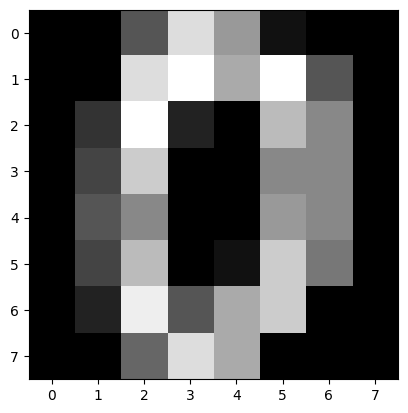

In [8]:
plt.imshow(digits.iloc[0, :-1].values.reshape(8, 8), cmap = 'gray')

### `scikit-learn` visualizers

- `PrecisionRecallDisplay`
- `ROCurveDisplay`

from `skplot` [docs](https://scikit-plot.readthedocs.io/en/stable/metrics.html)

- `plot_cumulative_gain`

In [9]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [10]:
import scikitplot as skplot